# Portfolio Optimization (Crypto)

In [117]:
import numpy as np 
import pandas as pd
import quandl
import matplotlib.pyplot as plt


In [118]:
import pandas_datareader
import datetime

In [119]:
import pandas_datareader.data as web

In [120]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2021, 6, 1)

In [125]:
ether = web.DataReader("ETH-USD", 'yahoo', start, end)
btc = web.DataReader("BTC-USD", 'yahoo', start, end)
neo =  web.DataReader("NEO-USD", 'yahoo', start, end)
xrp = web.DataReader("XRP-USD", 'yahoo', start, end)

In [126]:
ether.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,8.47123,7.98231,7.98231,8.17257,14731700.0,8.17257
2017-01-02,8.43633,8.05441,8.17087,8.37851,14579600.0,8.37851
2017-01-03,9.99680,8.31717,8.37458,9.72525,33625200.0,9.72525
2017-01-04,11.27640,9.55981,9.70929,11.25160,41051200.0,11.25160
2017-01-05,11.89090,9.40268,11.28680,10.25440,41557400.0,10.25440


In [127]:
ether = ether.drop(["High","Low","Open","Close","Volume"], axis=1)
btc = btc.drop(["High","Low","Open","Close","Volume"], axis=1)
neo = neo.drop(["High","Low","Open","Close","Volume"], axis=1)
xrp = xrp.drop(["High","Low","Open","Close","Volume"], axis=1)

In [128]:
xrp.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
               '2021-05-31', '2021-06-01'],
              dtype='datetime64[ns]', name='Date', length=1610, freq=None)

In [129]:
stocks = pd.concat([ether,btc,neo,xrp], axis =1)
stocks.head()

,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,
2017-01-01,8.17257,998.325012,0.141841,0.006368
2017-01-02,8.37851,1021.750000,0.145642,0.006311
2017-01-03,9.72525,1043.839966,0.140422,0.006386
2017-01-04,11.25160,1154.729980,0.136734,0.006570
2017-01-05,10.25440,1013.380005,0.131070,0.006201


In [62]:
stocks.columns = ["ETHER","BTC","NEO","XRP"]

In [63]:
stocks.head()

,ETHER,BTC,NEO,XRP
Date,,,,
2017-01-01,8.17257,998.325012,0.141841,0.006368
2017-01-02,8.37851,1021.750000,0.145642,0.006311
2017-01-03,9.72525,1043.839966,0.140422,0.006386
2017-01-04,11.25160,1154.729980,0.136734,0.006570
2017-01-05,10.25440,1013.380005,0.131070,0.006201


In [64]:
stocks.pct_change(1).mean()

ETHER    0.005288
BTC      0.003177
NEO      0.007135
XRP      0.006436
dtype: float64

In [65]:
stocks.pct_change(1).corr()

,ETHER,BTC,NEO,XRP
ETHER,1.000000,0.654843,0.515612,0.386288
BTC,0.654843,1.000000,0.473175,0.358495
NEO,0.515612,0.473175,1.000000,0.306572
XRP,0.386288,0.358495,0.306572,1.000000


In [66]:
stocks.pct_change(1).head()

,ETHER,BTC,NEO,XRP
Date,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,0.025199,0.023464,0.026798,-0.008951
2017-01-03,0.160737,0.021620,-0.035841,0.011884
2017-01-04,0.156947,0.106233,-0.026264,0.028813
2017-01-05,-0.088627,-0.122410,-0.041423,-0.056164


In [67]:
log_returns = np.log(stocks/stocks.shift(1))

In [68]:
log_returns.head()

,ETHER,BTC,NEO,XRP
Date,,,,
2017-01-01,NaN,NaN,NaN,NaN
2017-01-02,0.024887,0.023193,0.026445,-0.008991
2017-01-03,0.149055,0.021389,-0.036499,0.011814
2017-01-04,0.145785,0.100960,-0.026615,0.028406
2017-01-05,-0.092803,-0.130575,-0.042306,-0.057803


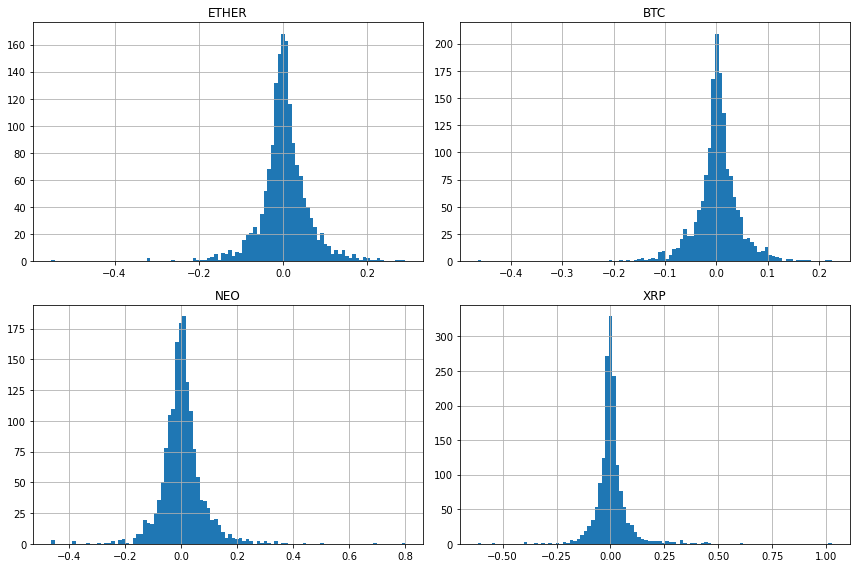

In [69]:
log_returns.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [70]:
log_returns.mean()

ETHER    0.003606
BTC      0.002255
NEO      0.003735
XRP      0.003158
dtype: float64

In [71]:
log_returns.cov() * 252


,ETHER,BTC,NEO,XRP
ETHER,0.846407,0.429479,0.683823,0.532206
BTC,0.429479,0.466935,0.461853,0.359188
NEO,0.683823,0.461853,1.638577,0.624823
XRP,0.532206,0.359188,0.624823,1.537268


In [72]:
#maintain the same random numbers
np.random.seed(101)

num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_returns.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [73]:
sharpe_arr.max()

1.0338303542002953

In [74]:
sharpe_arr.argmax()

45

In [75]:
#optimal allocations ETH, BTC , NEO , XRP
all_weights[45,:]


array([0.54852627, 0.24385035, 0.09737976, 0.11024362])

In [76]:
ret_arr[45]

0.8164181398952661

In [77]:
max_sr_ret = ret_arr[1050]
max_sr_vol = vol_arr[1050]

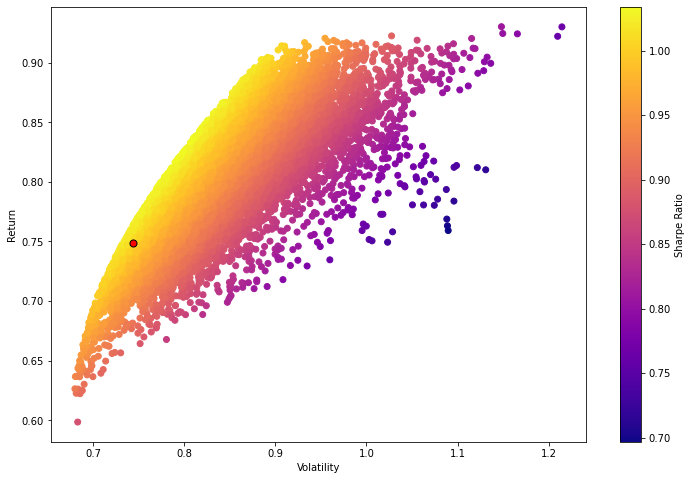

In [78]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')


# Mathematical Optimization 

# Functionalize and Return SR operations

In [79]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [80]:
from scipy.optimize import minimize


Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [81]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [82]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [83]:
 # By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [84]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [85]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [86]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [87]:
opt_results

     fun: -1.0338405896046896
     jac: array([-4.87118959e-05, -2.24113464e-05,  3.62500548e-04, -4.01288271e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.54764547, 0.24352833, 0.10065326, 0.10817294])

In [88]:
opt_results.x

array([0.54764547, 0.24352833, 0.10065326, 0.10817294])

In [89]:
get_ret_vol_sr(opt_results.x)

array([0.81686779, 0.79012935, 1.03384059])

In [90]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [91]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [92]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

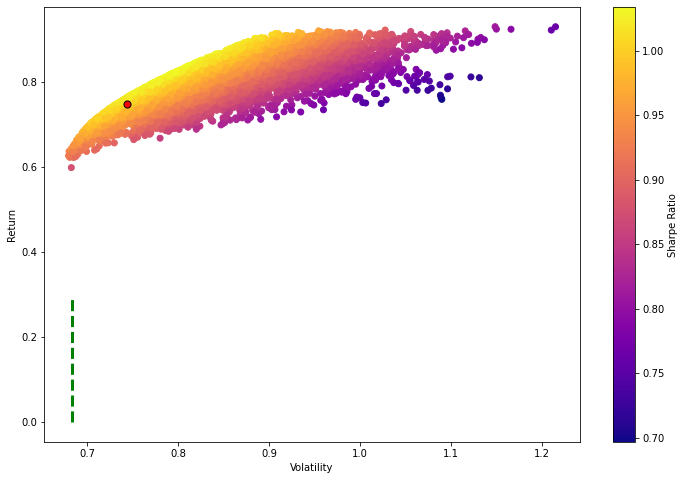

In [93]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')